In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Import libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [3]:
#Load dataset and visualize 
df = pd.read_csv('/content/drive/MyDrive/AAI510/MODULE1/home-credit-default-risk/application_train.csv')
print('Training dataset size:' , df.shape)
print(df.head())

Training dataset size: (307511, 122)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \


In [4]:
#Drop rows with Nan values and convert object types to int
df = df.dropna()

for column in df:
  if df[column].dtypes == 'object':
    df[column] = df[column].astype('category')
    df[column] = df[column].cat.codes

In [5]:
#Assign features and targets and standardize data
y = df['TARGET']
x = df.drop(columns=['TARGET']) 

scaler = StandardScaler()
stdx = scaler.fit_transform(x) 
x = pd.DataFrame(data=stdx, columns=x.columns)

In [6]:
#Build PCA
pca = PCA(n_components=10, random_state=10) 
df_pca = pca.fit_transform(x)

pca_col = [] 
for i in range(0, len(df_pca[0])): 
  pca_col.append("PC"+str(i))
pca_db_df = pd.DataFrame(data=df_pca, columns=pca_col)
print(pca_db_df)

            PC0       PC1       PC2        PC3       PC4       PC5       PC6  \
0      0.257954 -1.525957 -1.547924  -0.067427  0.671612  1.878075  2.612988   
1     -1.573347  1.730228 -0.743857  -0.289032 -0.261753  1.294362  1.330943   
2     24.055994 -0.114252  1.946645  14.794384 -1.939787  0.366211 -1.475908   
3      8.795450  1.569849 -1.812079  -2.504568  0.027091  0.834450  0.770638   
4      8.090499 -4.210714  1.576645  -0.532276  3.996649 -2.134773  2.238947   
...         ...       ...       ...        ...       ...       ...       ...   
8597  -0.693903  0.314741 -3.259483   0.736834  0.011290 -2.840126 -0.954128   
8598   2.613344  2.299592 -2.073509  -0.398876 -0.519959  1.010002  0.009471   
8599  -2.293019 -0.602067 -0.416520  -0.346461 -1.476199  0.483269  3.896761   
8600  -5.416134  0.319197  0.548936   0.054603 -0.539380  1.256609 -1.763669   
8601  -3.755162 -0.916031  1.712093   0.246692  0.992124  1.100131 -0.921755   

           PC7       PC8       PC9  
0 

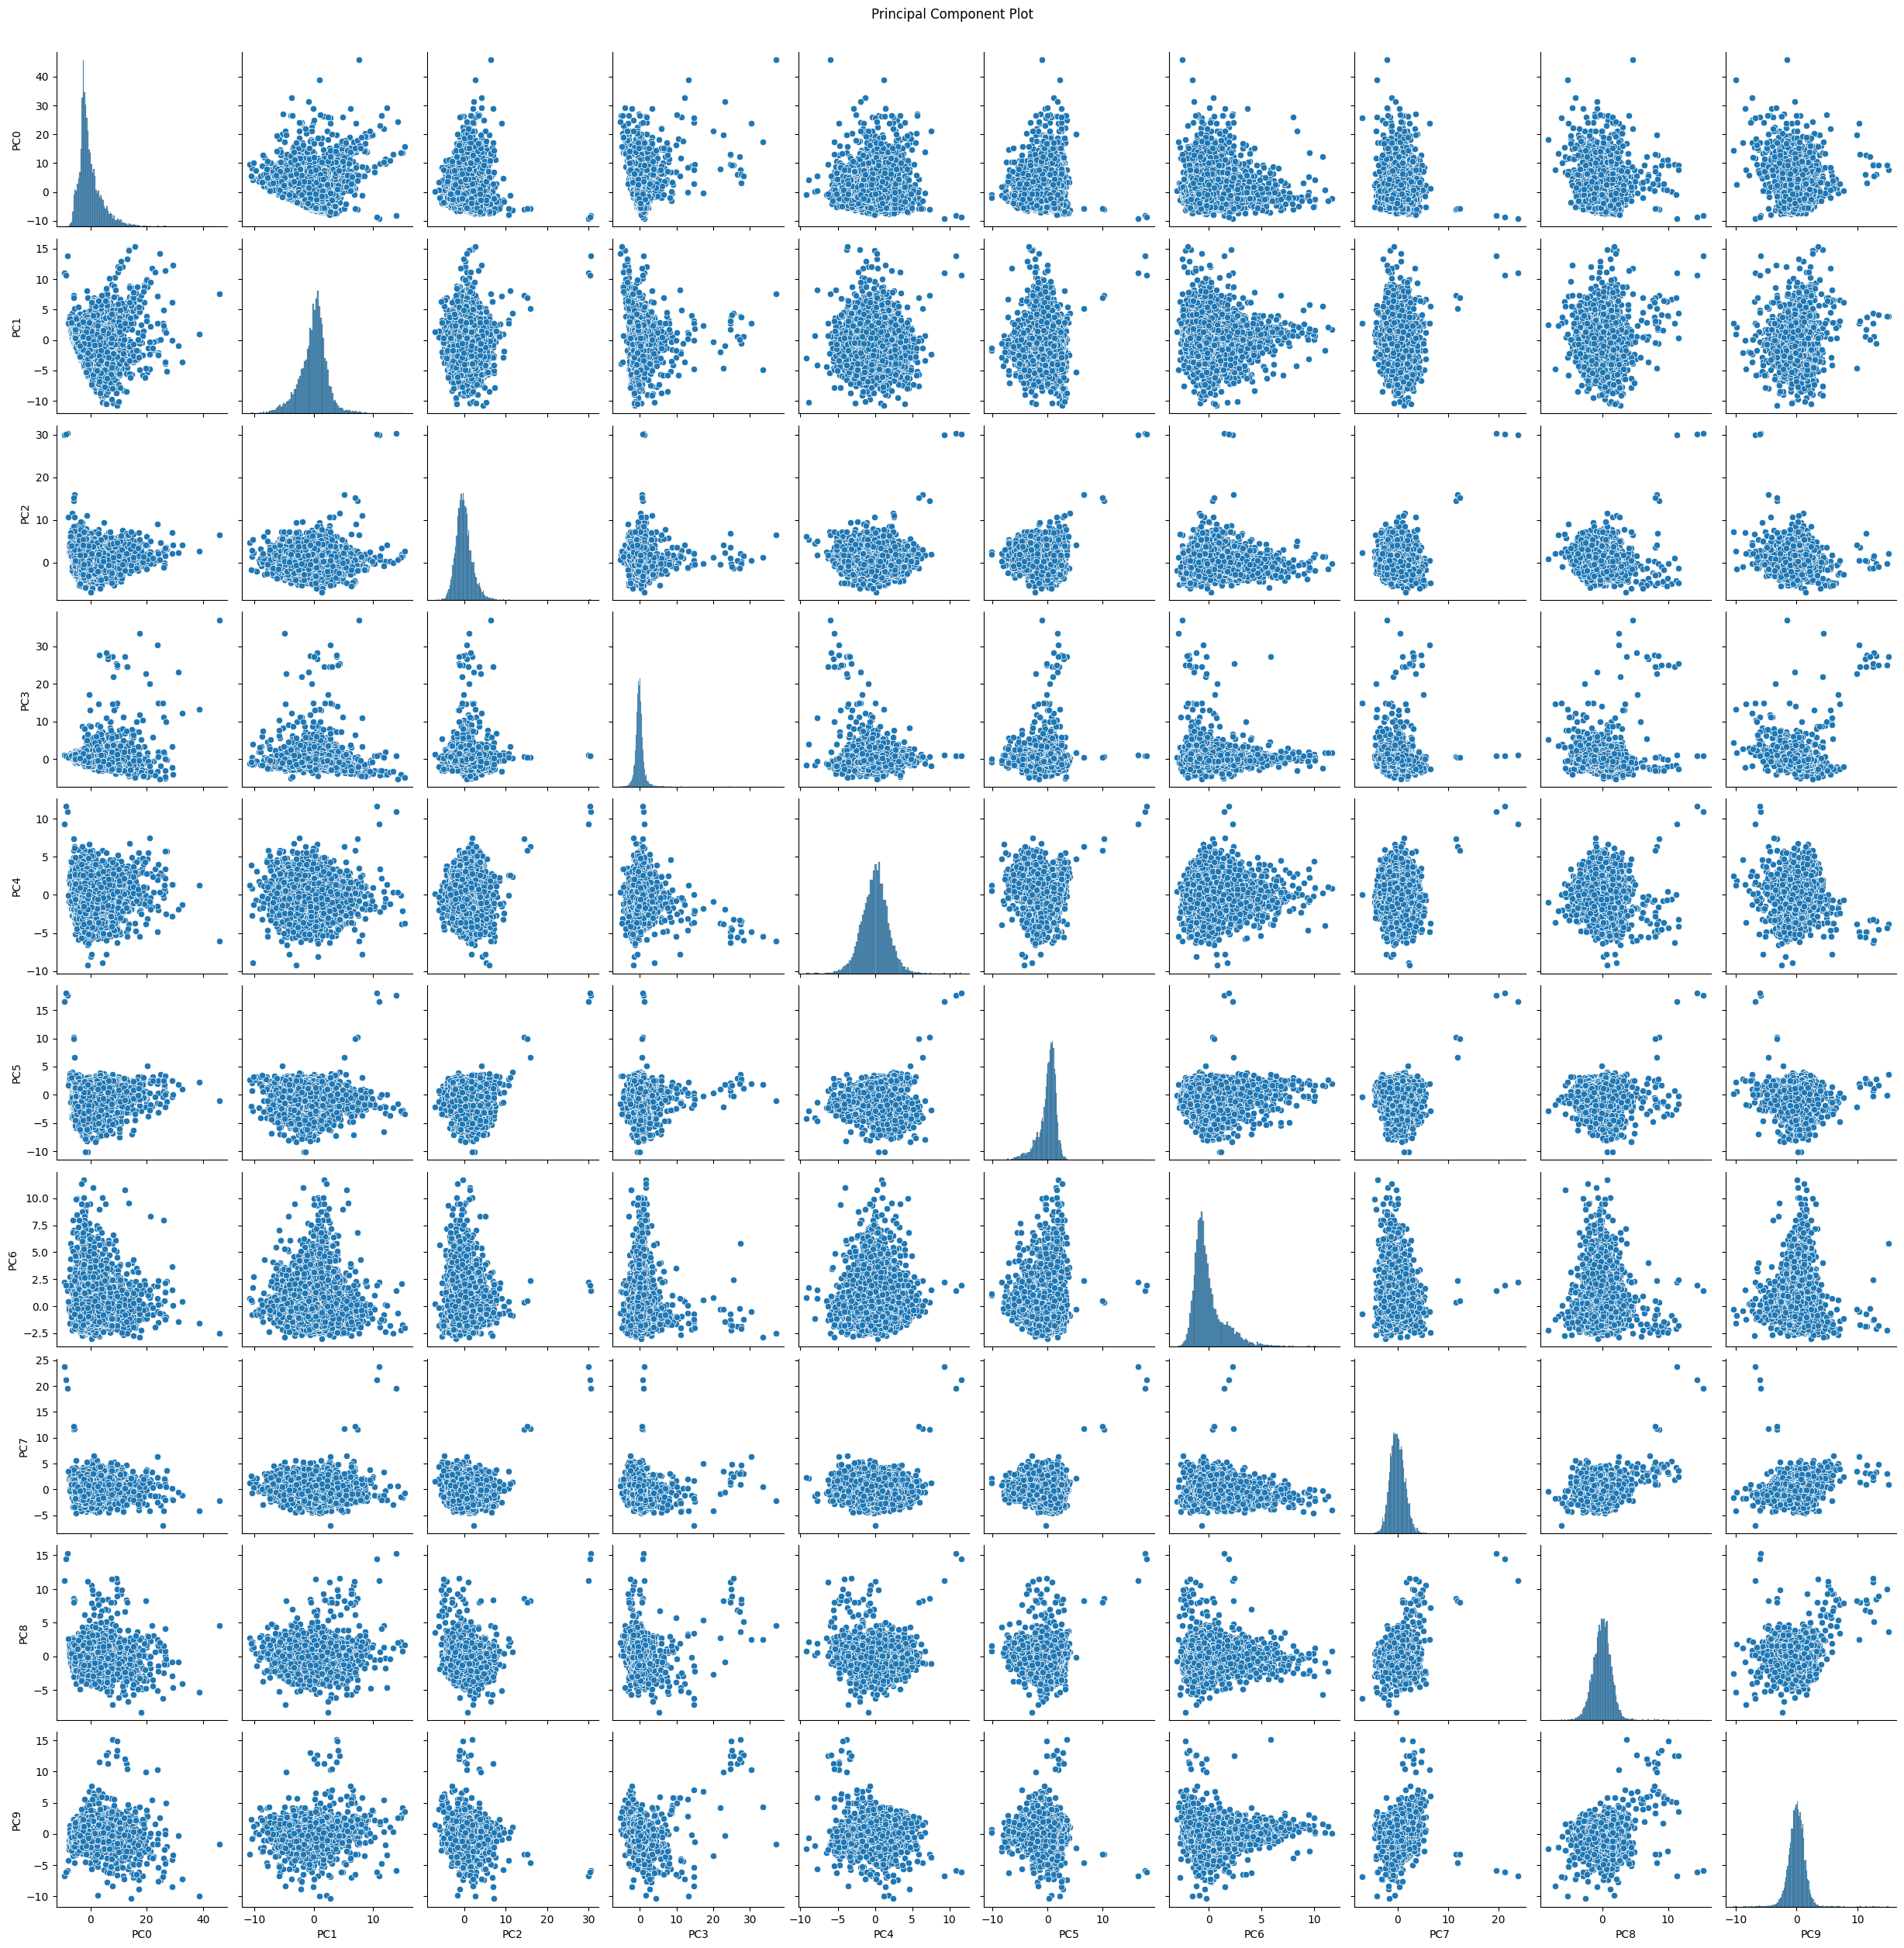

<Figure size 1200x800 with 0 Axes>

In [7]:
#Plot PCAs
pca_plot = sns.pairplot(pca_db_df)
plt.figure(figsize=(12,8))
pca_plot.fig.suptitle('Principal Component Plot', y=1.01)
plt.show()

Variance Explained by each component:
 [0.16937962 0.04872369 0.03547285 0.02854089 0.02618912 0.02470102
 0.02099314 0.01917692 0.01883399 0.01751358]


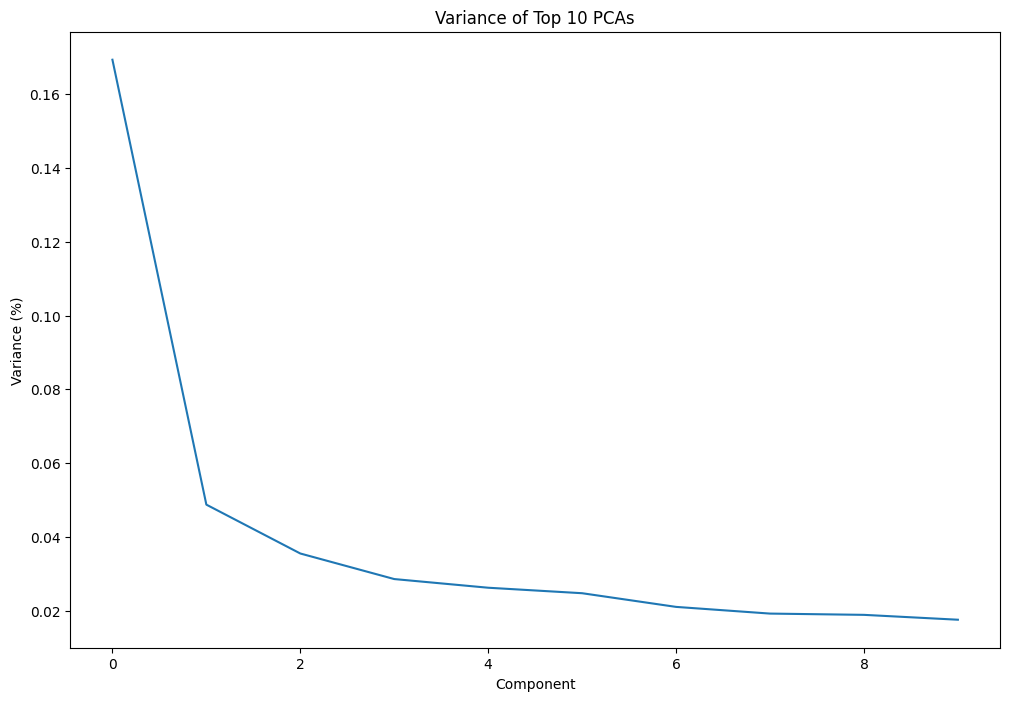

In [8]:
#Show variance between PCAs 
print("Variance Explained by each component:\r\n", pca.explained_variance_ratio_)
plt.figure(figsize=(12,8))
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance of Top 10 PCAs')
plt.xlabel('Component')
plt.ylabel('Variance (%)')
plt.show()
print('\n') #pdf printing purposes
print('\n')
print('\n')
print('\n')
print('\n')

The first component alone contains about 17% of the variability and the first 10 principal components keep almost 50% of the variability in the dataset while reducing the features from 122 to 10. The dataset is distributed such that beyond the first 10 components no value is added from individual components; however, compounding the amount of features that are removed a significant amount of variability is lost. 

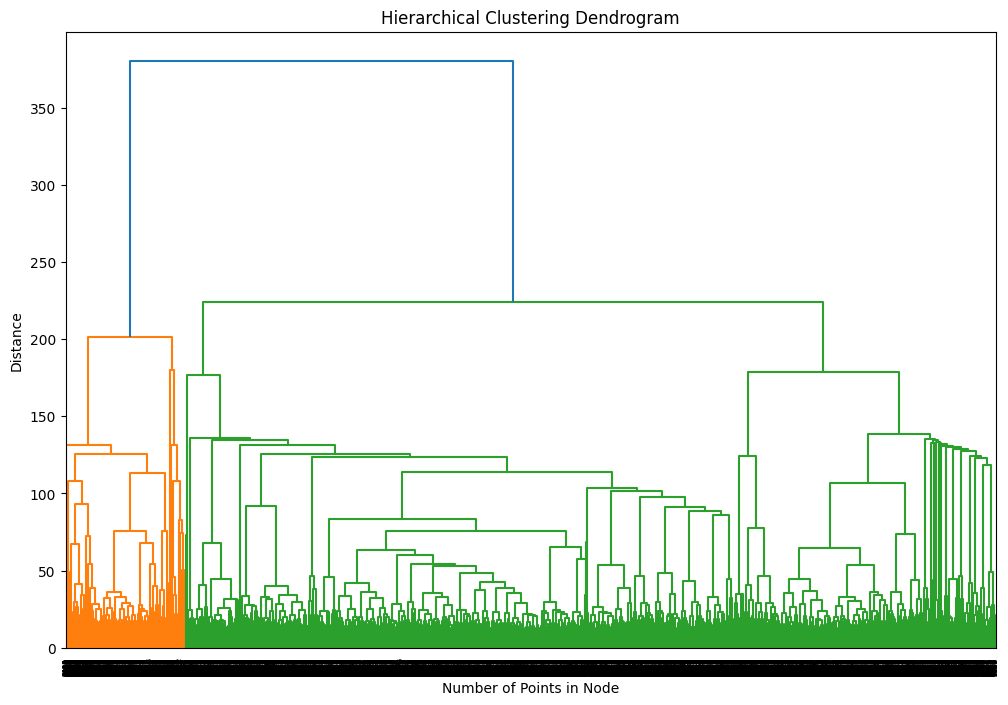

In [9]:
#visualize the tree using hierarchical clustering
plt.figure(figsize=(12,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Number of Points in Node')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.show()
print('\n') #pdf printing purposes
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')

The highest vertical distance that doesn’t intersect with any clusters is the top one. Given the vertical cut line at that spot results in the optimal number of clusters, 2. Ward was used as the distance method as it is effective with noisy data and large data sizes. Single, average, and complex distances were tried as well; however, the results were less interpretable.       

When compared to the CART branching generated in module 2, the CART methods produced more uniform and symmetric tree roots than the hierarchical clustering. 

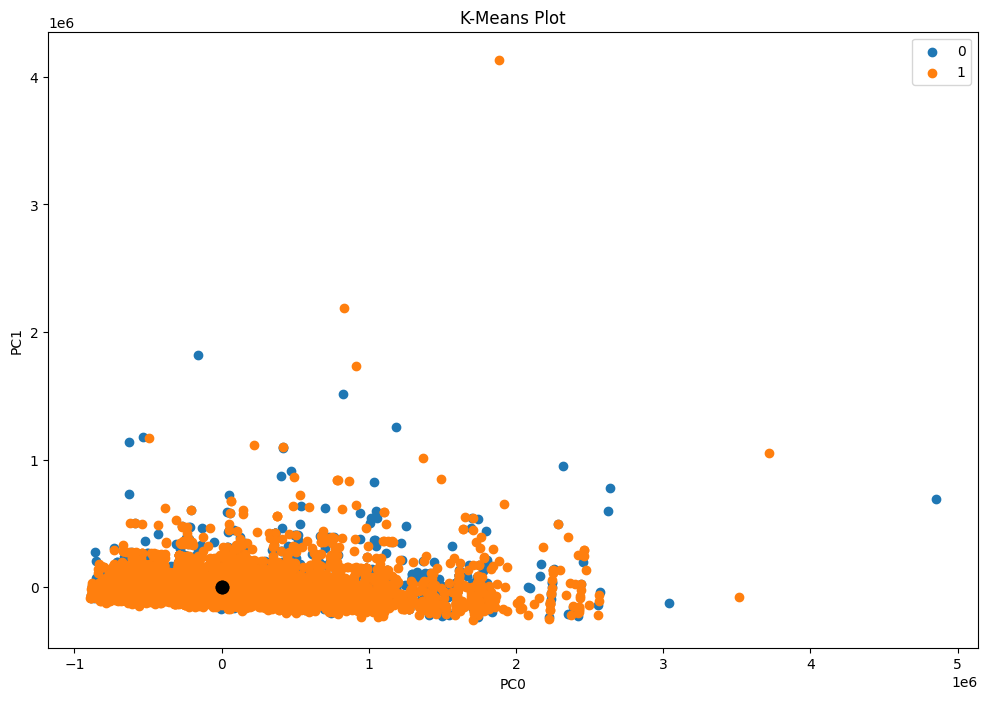

In [10]:
#Reduce dimensionality to 2 with PCA to allow visualization
#Cluster using KMeans and the clusters found using hierarchical clustering
pca = PCA(2)
data = pca.fit_transform(df)
kmean = KMeans(n_clusters = 2, init='k-means++', n_init='auto', random_state = 10, algorithm='lloyd')
y_kmeans = kmean.fit_predict(x)
centroids = kmean.cluster_centers_
u_labels = np.unique(y_kmeans)
x = np.array(x)
plt.figure(figsize=(12,8))
for i in u_labels:
    plt.scatter(data[y_kmeans == i , 0] , data[y_kmeans == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title('K-Means Plot')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()
print('\n') #pdf printing purposes
print('\n')
print('\n')
print('\n')
print('\n')

The k value selected follows the findings from the hierarchical clustering. When higher k values are used, the groups continue to overlap and are not distinct. The distance method used is lloyd which is widely implemented and has low computational effort. This method is chosen as the centroids are initially chosen at random which is benefitial as there is no indication of where they are.      
From plotting the clusters it is evident that the data cannot be effectively displayed in 2D or separated into distinct groups after reducing the dimensionality to 2. 